In [4]:
!pip install h5py numpy matplotlib tensorflow

In [5]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Bidirectional, LSTM
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [6]:
def simulate_signal(length=200, mod=False):
    base_signal = np.sin(np.linspace(0, 8*np.pi, length)) * 20 + 100
    noise = np.random.normal(0, 2, length)
    signal = base_signal + noise
    if mod:
        # Add modification effect: a small bump in the middle
        bump = np.exp(-0.5*((np.arange(length)-length//2)/(length//20))**2)*15
        signal += bump
    return signal

# Generate dataset
n_samples = 1000
X = np.array([simulate_signal(mod=bool(i%2)) for i in range(n_samples)])
y = np.array([1 if i%2 else 0 for i in range(n_samples)])

X = X[..., np.newaxis]  # Add channel dimension


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
model = Sequential([
    Conv1D(32, 5, activation='relu', input_shape=(X.shape[1], 1)),
    MaxPooling1D(2),
    Conv1D(64, 5, activation='relu'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 196, 32)        │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 98, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 94, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 47, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3008)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       192,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,137 (793.50 KB)

 Trainable params: 203,137 (793.50 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5294 - loss: 7.3445 - val_accuracy: 0.5188 - val_loss: 0.7269
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.4476 - loss: 0.8044 - val_accuracy: 0.5188 - val_loss: 0.6862
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.4887 - loss: 0.6998 - val_accuracy: 0.5188 - val_loss: 0.6882
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.5641 - loss: 0.6895 - val_accuracy: 0.4812 - val_loss: 0.6879
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.5126 - loss: 0.6900 - val_accuracy: 0.4812 - val_loss: 0.6873
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.5153 - loss: 0.6861 - val_accuracy: 0.5188 - val_loss: 0.6834
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5474 - loss: 0.6853 - val_accuracy: 0.5188 - val_loss: 0.6837
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5220 - loss: 0.6881 - val_accuracy: 0.4812 - v

In [10]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 1.0000 - loss: 0.5198  
Test Accuracy: 100.00%


In [11]:
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       103

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

Confusion Matrix:
 [[ 97   0]
 [  0 103]]


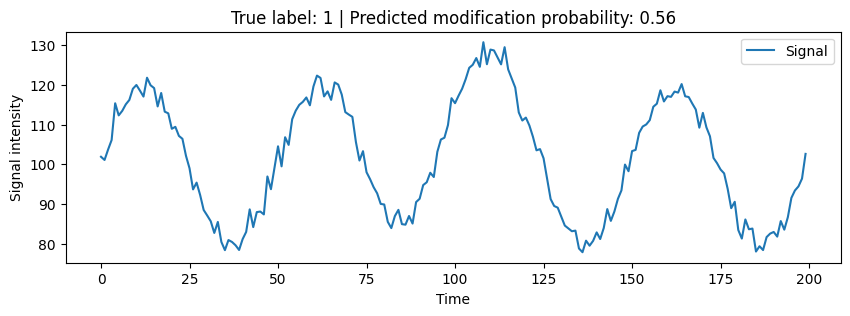

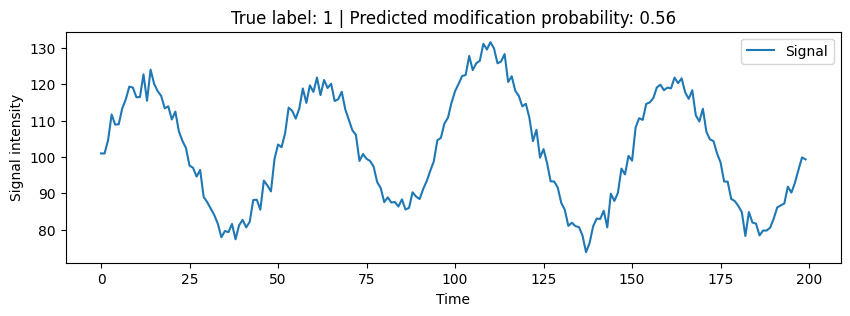

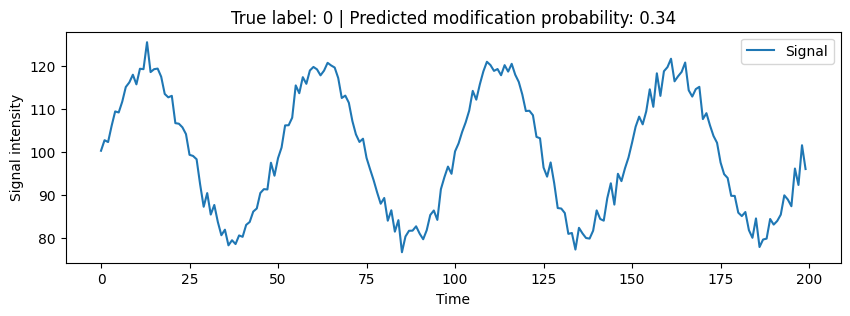

In [12]:
def plot_signal_with_prediction(signal, pred_prob, label):
    plt.figure(figsize=(10,3))
    plt.plot(signal.flatten(), label='Signal')
    plt.title(f"True label: {label} | Predicted modification probability: {pred_prob:.2f}")
    plt.xlabel("Time")
    plt.ylabel("Signal intensity")
    plt.legend()
    plt.show()

for i in range(3):
    plot_signal_with_prediction(X_test[i], y_pred_prob[i], y_test[i])

In [26]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, Bidirectional, LSTM, InputLayer
from sklearn.model_selection import train_test_split

# Simulate nanopore-like signal data for demo purposes
# Replace with your real dataset loading
num_samples = 1000
signal_length = 200
X = np.random.randn(num_samples, signal_length, 1).astype(np.float32)
y = np.random.randint(0, 2, size=(num_samples, 1))

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model with Bidirectional LSTM
model = Sequential([
    InputLayer(input_shape=(signal_length, 1)),
    Conv1D(32, 5, activation='relu'),
    MaxPooling1D(2),
    Conv1D(64, 5, activation='relu'),
    MaxPooling1D(2),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# 1. Normalize signals (new cell or before training)
X_train_norm = (X_train - np.mean(X_train, axis=1, keepdims=True)) / (np.std(X_train, axis=1, keepdims=True) + 1e-8)
X_test_norm = (X_test - np.mean(X_test, axis=1, keepdims=True)) / (np.std(X_test, axis=1, keepdims=True) + 1e-8)

# 2. Train model (replace old training data with normalized data)
model.fit(X_train_norm, y_train, epochs=10, batch_size=32, validation_data=(X_test_norm, y_test))

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_6 (Conv1D)               │ (None, 196, 32)        │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_6 (MaxPooling1D)  │ (None, 98, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 94, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_7 (MaxPooling1D)  │ (None, 47, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ (None, 128)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,865 (331.50 KB)

 Trainable params: 84,865 (331.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - accuracy: 0.4820 - loss: 0.7010 - val_accuracy: 0.5250 - val_loss: 0.6929
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - accuracy: 0.5223 - loss: 0.6939 - val_accuracy: 0.5250 - val_loss: 0.6921
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.5309 - loss: 0.6916 - val_accuracy: 0.5250 - val_loss: 0.6919
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 86ms/step - accuracy: 0.5178 - loss: 0.6933 - val_accuracy: 0.5250 - val_loss: 0.6920
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.5120 - loss: 0.6959 - val_accuracy: 0.5250 - val_loss: 0.6922
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.5027 - loss: 0.6929 - val_accuracy: 0.5250 - val_loss: 0.6919
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 61ms/step - accuracy: 0.5052 - loss: 0.6933 - val_accuracy: 0.5250 - val_loss: 0.6927
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.5317 - loss: 0.6884 - val_accuracy: 0.5150 - v

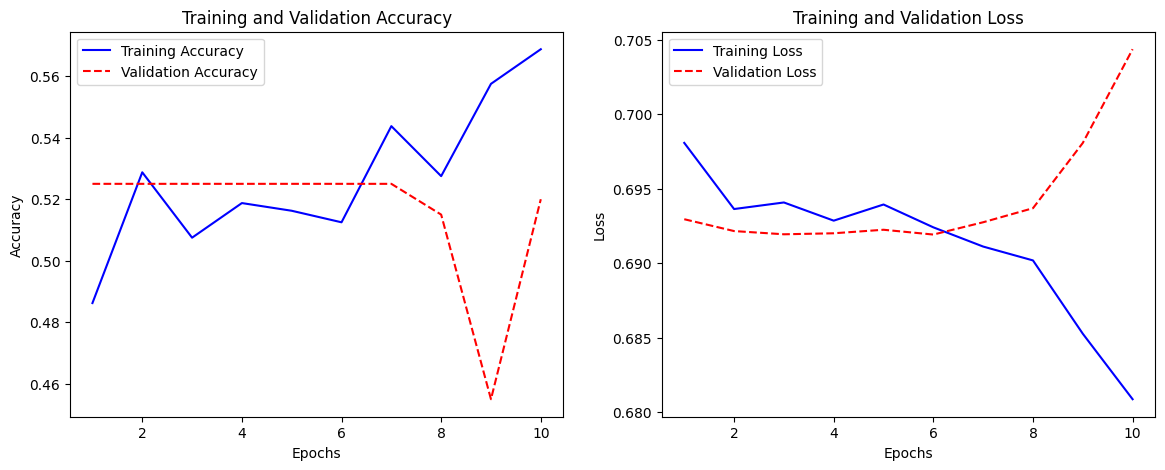

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 79ms/step


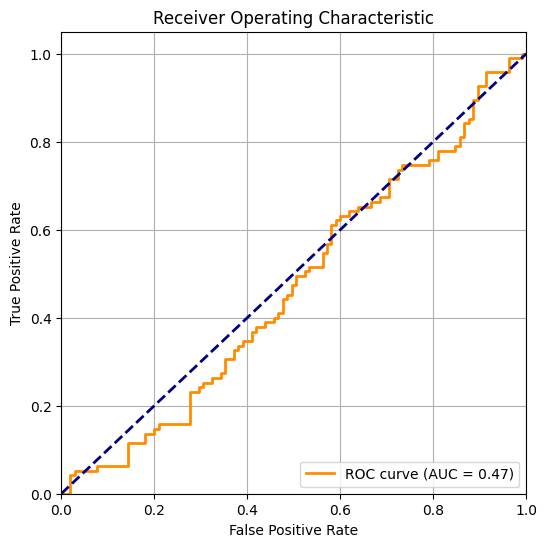

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot training & validation accuracy and loss
history_dict = model.history.history  # or from your returned history object

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.figure(figsize=(14,5))

plt.subplot(1, 2, 1)
plt.plot(epochs, history_dict['accuracy'], 'b-', label='Training Accuracy')
plt.plot(epochs, history_dict['val_accuracy'], 'r--', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, history_dict['loss'], 'b-', label='Training Loss')
plt.plot(epochs, history_dict['val_loss'], 'r--', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Predict probabilities on test set
y_pred_prob = model.predict(X_test_norm).ravel()

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


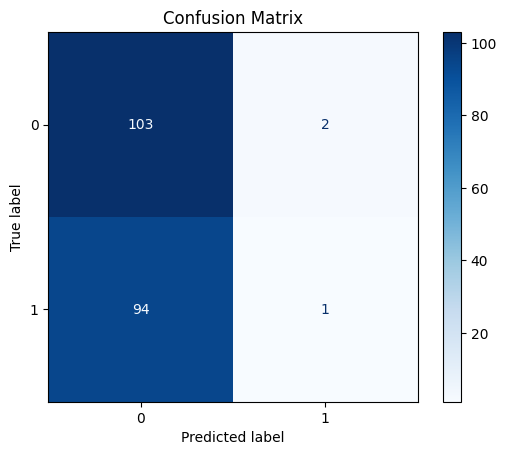

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_classes = (model.predict(X_test_norm) > 0.5).astype(int)

cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred_classes = (model.predict(X_test_norm) > 0.5).astype(int)

precision = precision_score(y_test, y_pred_classes)
recall = recall_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Precision: 0.333
Recall: 0.011
F1 Score: 0.020


In [30]:
import numpy as np

# Create a dummy new sample normalized like training data
new_sample = np.random.randn(1, X_train.shape[1], X_train.shape[2])
new_sample = (new_sample - np.mean(new_sample, axis=1, keepdims=True)) / (np.std(new_sample, axis=1, keepdims=True) + 1e-8)

pred_prob = model.predict(new_sample)[0][0]
print(f"Predicted probability of RNA modification: {pred_prob:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted probability of RNA modification: 0.4303


In [33]:
# Save model with new recommended format
model.save('rna_modification_model.keras')
print("Model saved!")

# Load model
loaded_model = tf.keras.models.load_model('rna_modification_model.keras')
print("Model loaded!")

Model saved!
Model loaded!


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


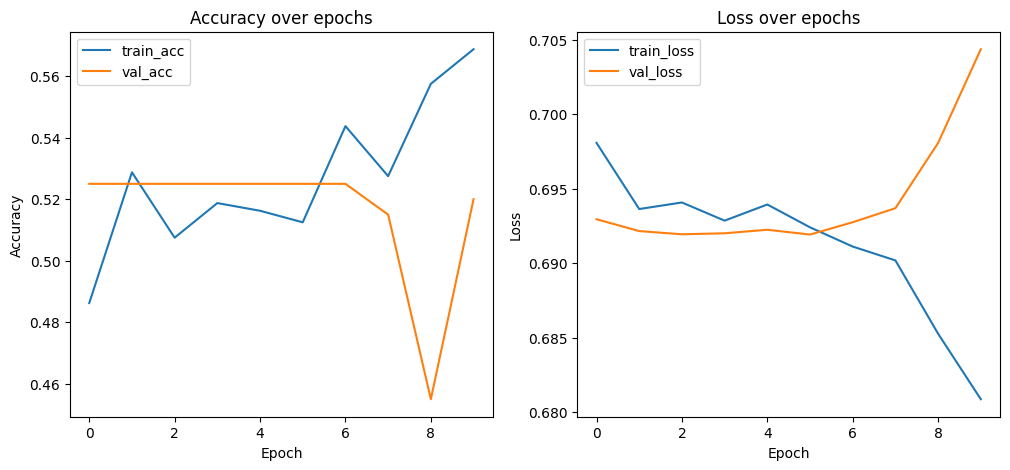

In [32]:
import matplotlib.pyplot as plt

history = model.history

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='train_acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()